In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
advertising = pd.DataFrame(pd.read_csv("Advertising.csv"))
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising.shape

(200, 5)

### Observation:-
There is a Unnamed:0 column which is S.No. or index, we can delete this column.

In [5]:
df = advertising.iloc[:,1:]

### Observation:-
Removed Unnamed column

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Observation:-
1. Total count is 200 in every column, we can say there is no missing value in any of the column.
2. Mean and Median has very less difference, hence there very little or no skewness.
3. Mean and Max value has not abnormal difference, it indicate that there is no outlier.

### Checking for Null Values.

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Text(0.5, 1.0, 'Null Value Heat Map')

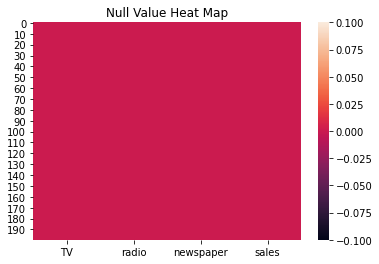

In [93]:
sns.heatmap(df.isnull())
plt.title("Null Value Heat Map")

### Observation:-
No Null value exist in this dataset.

### Outlier detection:-

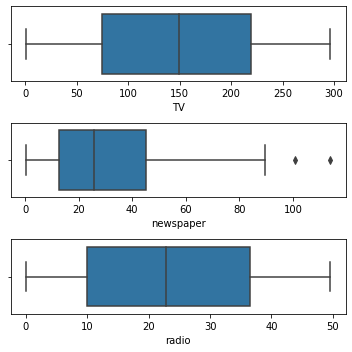

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

# Observation:-
1. No Null value in TV and radio column(Variable).
2. There are few outlier in newspaper, but those are near to whisker, hence we can ignore them.

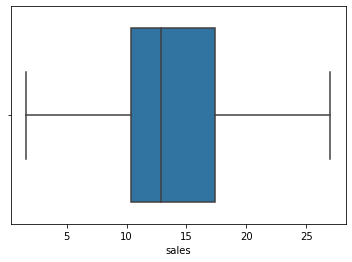

In [21]:
sns.boxplot(df['sales'])
plt.show()

### Observation:-
No Outlier in target veriable as well.

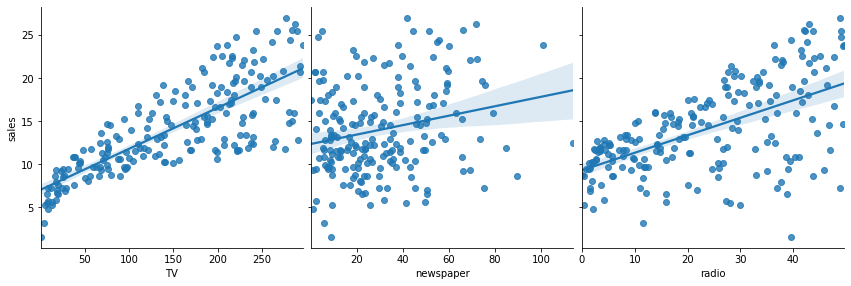

In [22]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='reg')
plt.show()

### Observation:-
1. Scatter plot shows that there is a strong linear relation shot of TV and Sales .
2. Scatter plot shows that there is a strong relation for radio and Sales.
3. newpaper has very less correlation with sales.

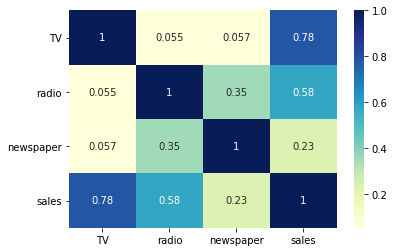

In [23]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Observation:- 
1. TV indipendent veriable having strong positive correlation with Sales.
2. Radio variable is also having positive corelation with sales.
3. newpaper have positive correlation but it is very week.

In [62]:
x =df[["TV","radio","newspaper"]] 
y = df['sales']

In [63]:
x.shape

(200, 3)

In [64]:
y.shape

(200,)

In [36]:
# test and train split
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.42,random_state=158)

### Linear Regression model

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)
print (lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [66]:
y_pred = model.predict(x)
print(y_pred)

[20.30432899 12.1106179  12.03987019 17.36030396 13.1094143  12.19347299
 11.541533   12.00750259  3.70135892 12.52322355  6.98347661 17.15157788
 10.36604222  8.77312687 18.24469101 20.55137666 12.5948257  23.00070567
  9.82849235 14.02747668 17.93660631 14.70059154  6.38066038 16.44419476
  8.06388575 15.58004823 14.82445452 16.95209534 19.25755756  9.03879822
 21.47129581 11.23542067  7.61180793 18.75374216  7.55354666 16.97715691
 23.17150476 15.3448852   9.74876923 20.2371753  16.24602473 17.10463965
 21.4460275  13.90529242  8.73066179 15.02805913  8.80140462 21.49611991
 16.16194605  8.08595829 12.59785192  9.27725362 20.4297672  19.68276998
 20.21473962 21.01434904  8.35802837 12.66050064 21.62436212 17.97019038
  5.71322406 22.65008597 16.68981475 13.04387632 16.73883095  7.78773476
  8.87435463 11.94876956 18.82399677 20.86728343 17.60325943 10.5337931
 10.1776647   9.85488844 17.19048398 11.59713212  4.45011222 13.64992681
  8.64181804  9.61842156 11.29001624 14.6100711  10.

In [67]:
from sklearn import metrics
import numpy as np

#calculate RMSE for 3 features
RMSE = np.sqrt(metrics.mean_squared_error(y_pred,y))
print(RMSE)

1.676096987523484


In [68]:
res = (y - y_pred)

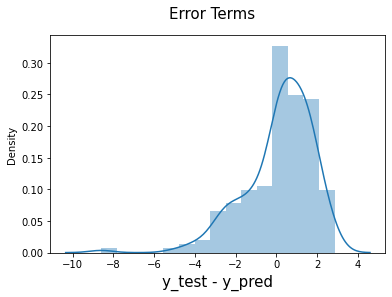

In [69]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_pred', fontsize = 15)         # X-label
plt.show()

### residual value has some skewness, indicating that there is some correction need.

<AxesSubplot:xlabel='sales'>

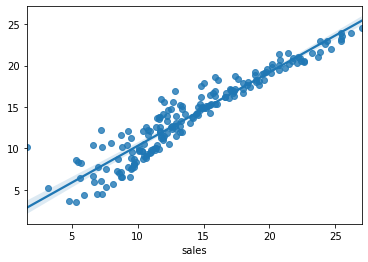

In [70]:
sns.regplot(y,y_pred)

### Observation:-
actual value and predicted value has linear relation.

In [71]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
print("Accurecy Score",round(lm.score(x,y)* 100,2))
print("R2 Score", r2_score(y, y_pred))
print("Cross Val Score", cross_val_score(lm, x, y, cv=5).mean())

Accurecy Score 89.72
R2 Score 0.8962811899309467
Cross Val Score 0.8871063495438435


### Obsarvation:-
R2 score for thispredictin is around 90%, which is good score.

# LASSO

In [83]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=.001)
#ls=lasso(alpha=1.0) #default
ls.fit(x,y)
print (ls.intercept_)
print(ls.coef_)
print(ls.score(x,y))

2.9389448463989467
[ 0.04576452  0.18852359 -0.00103379]
0.8972106378011765


In [84]:
y_pred = model.predict(x)
print(y_pred)

[20.30432899 12.1106179  12.03987019 17.36030396 13.1094143  12.19347299
 11.541533   12.00750259  3.70135892 12.52322355  6.98347661 17.15157788
 10.36604222  8.77312687 18.24469101 20.55137666 12.5948257  23.00070567
  9.82849235 14.02747668 17.93660631 14.70059154  6.38066038 16.44419476
  8.06388575 15.58004823 14.82445452 16.95209534 19.25755756  9.03879822
 21.47129581 11.23542067  7.61180793 18.75374216  7.55354666 16.97715691
 23.17150476 15.3448852   9.74876923 20.2371753  16.24602473 17.10463965
 21.4460275  13.90529242  8.73066179 15.02805913  8.80140462 21.49611991
 16.16194605  8.08595829 12.59785192  9.27725362 20.4297672  19.68276998
 20.21473962 21.01434904  8.35802837 12.66050064 21.62436212 17.97019038
  5.71322406 22.65008597 16.68981475 13.04387632 16.73883095  7.78773476
  8.87435463 11.94876956 18.82399677 20.86728343 17.60325943 10.5337931
 10.1776647   9.85488844 17.19048398 11.59713212  4.45011222 13.64992681
  8.64181804  9.61842156 11.29001624 14.6100711  10.

In [85]:
#calculate RMSE for 3 features
RMSE = np.sqrt(metrics.mean_squared_error(y_pred,y))
print(RMSE)

1.676096987523484


### Observation:-
1. Root mean square error is 1.67.

In [86]:
print("Accurecy Score",round(ls.score(x,y)* 100,2))
print("R2 Score", r2_score(y, y_pred))
print("Cross Val Score", cross_val_score(ls, x, y, cv=5).mean())

Accurecy Score 89.72
R2 Score 0.8962811899309467
Cross Val Score 0.887107845339324


### Ridge Model

In [87]:
#try to minimize the coeefocoent variance 
rd = Ridge(alpha=.001)
#rd.Ridge()
rd.fit(x,y)
print (rd.intercept_)
print(rd.coef_)
print(rd.score(x,y))

2.938889447549961
[ 0.04576465  0.18853001 -0.00103749]
0.897210638178952


In [ ]:
y_pred = model.predict(x)
print(y_pred)

In [89]:
print("Accurecy Score",round(rd.score(x,y)* 100,2))
print("R2 Score", r2_score(y, y_pred))
print("Cross Val Score", cross_val_score(rd, x, y, cv=5).mean())

Accurecy Score 89.72
R2 Score 0.8962811899309467
Cross Val Score 0.8871063499723165


### ElasticNet

In [90]:
#ElasticNet is a combination of both Lasso and Ridge 
from sklearn.linear_model import ElasticNet 
enr=ElasticNet(alpha=.001)
#enr = ElasticNet()
enr.fit(x,y)
enrpred=enr.predict(x)
print (rd.intercept_)
print(rd.coef_)
print(rd.score(x,y))

2.938889447549961
[ 0.04576465  0.18853001 -0.00103749]
0.897210638178952


In [91]:
print(enrpred)

[20.52399129 12.33783087 12.30767183 17.59781754 13.1887705  12.47834936
 11.72971668 12.12293117  3.72736998 12.55090324  7.03235653 17.2850698
 10.57715458  8.82631566 18.43435743 20.81925001 12.82377679 23.22493768
  9.95167325 14.16604803 18.10079117 14.74058555  6.48922373 16.54594254
  8.14653971 15.61008233 14.98945693 17.05167656 19.41050215  9.14407589
 21.63393054 11.34613263  7.63896574 18.86421309  7.57486912 17.00684424
 23.40576652 15.62341572  9.90868407 20.4475546  16.37766667 17.29595981
 21.59572072 13.96389969  8.88790399 15.16152599  8.87344999 21.72253272
 16.26368059  8.16822586 12.63129036  9.33981348 20.66292076 19.94466785
 20.37437324 21.29256855  8.52772514 12.7745763  21.89796455 18.13341796
  5.74222227 22.89064029 16.784277   13.21062791 16.97766115  7.84904369
  9.01597846 12.03700015 18.97651922 21.10882502 17.77948333 10.62697597
 10.36679854  9.90304959 17.32926836 11.85837048  4.47765753 13.81185244
  8.81325664  9.67534817 11.44589932 14.64801818 10.

In [92]:
print("Accurecy Score",round(rd.score(x,y)* 100,2))
print("R2 Score", r2_score(y, y_pred))
print("Cross Val Score", cross_val_score(rd, x, y, cv=5).mean())

Accurecy Score 89.72
R2 Score 0.8962811899309467
Cross Val Score 0.8871063499723165
